<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Kaggle;</li>
  <li>Introdução ao problema de negócios;</li>
  <li>Exploração de dados.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

A proposta no meu projeto é realizar uma análise exploratória dos dados disponibilizados pela empresa Loggi junto com a EBAC, para o curso de Analista de Dados.

Vamos analisar as seguintes questões:

1 Qual a porcentagem de entregas entre as regiões de origem? Qual a região que possui maior quantidade de entregas?

2 Quantidade de entregas por centro de distribuição! Uma outra visualização da quantidade de entregas por centro de distribuição.Top 30 dos bairros com maior peso nas entregas!

3 Qual a proporção de entregas por região de destino "cidades e bairros". 

4 Visualização das entregas por concentração em regiões de destino(Geolocalização). 


Sou inciante na área e por isso trago análises mais simples! Pretendo melhorar ao longo da minha carreira, qualquer ajuda eu agradeço!

## 2\. Pacotes e bibliotecas

In [172]:
# instalando pacote geopandas no ambiente virtual

!pip3 install geopandas;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
# importando pacotes e bibliotecas seguindo as instruções do professor.

import json

import geopandas
import geopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim

## 3\. **Exploração de dados**

##3. 1. Coleta de Dados

In [174]:
# Coletando os dados da Loggi disponibilizados no github no formato json

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [175]:
# extraindo dados brutos em um dict

with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

In [176]:
# checando quantidade de registros do arquivo
len(data)

199

In [177]:
# extraindo exemplo para exploração

example = data[0]

In [127]:
# consultando chaves da estrutura

example.keys()

dict_keys(['name', 'region', 'origin', 'vehicle_capacity', 'deliveries'])

In [178]:
# explorando valores de cada chave da estrutura
for key in example:
  print(key + ' ' + str(type(example[key])) + ' : ' + str(example[key]) + '\n')

name <class 'str'> : cvrp-2-df-33

region <class 'str'> : df-2

origin <class 'dict'> : {'lng': -48.05498915846707, 'lat': -15.83814451122274}

vehicle_capacity <class 'int'> : 180

deliveries <class 'list'> : [{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'point': {'lng': -48.11618888384239, 'lat': -15.848929154862294}, 'size': 9}, {'id': '320c94b17aa685c939b3f3244c3099de', 'point': {'lng': -48.11819489551, 'lat': -15.850772371049631}, 'size': 2}, {'id': '3663b42f4b8decb33059febaba46d5c8', 'point': {'lng': -48.11248339849675, 'lat': -15.84787055941764}, 'size': 1}, {'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'point': {'lng': -48.11802268617869, 'lat': -15.846471025281456}, 'size': 2}, {'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'point': {'lng': -48.114898174591026, 'lat': -15.85805462185708}, 'size': 7}, {'id': '71271df40c3188cda88266f9969a5a9', 'point': {'lng': -48.120447632397045, 'lat': -15.8477803198514}, 'size': 10}, {'id': 'be0cd4bee278b16f3473c8fb05e96464', 'point': {'lng': -48.12180

In [179]:
example['deliveries'][1]

{'id': '320c94b17aa685c939b3f3244c3099de',
 'point': {'lng': -48.11819489551, 'lat': -15.850772371049631},
 'size': 2}

##3. 2. Data Wrangling

In [180]:
# criação do Dataframe através dos dados brutos

deliveries_df = pd.DataFrame(data)

deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [181]:
# extraindo e manipulando dados da coluna origin usando o método 'normalize' geramos aqui duas colunas lgn(longitude) e lat(latitude) dos dados que estavam aninhados.

hub_origin_df = pd.json_normalize(deliveries_df['origin'])
hub_origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


In [182]:
# realizando merge dos dados normalizados com o dataframe original

deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


In [183]:
# usando o 'drop' para remover a coluna origin
deliveries_df = deliveries_df.drop('origin', axis=1)

# reorganizando a ordem das colunas
deliveries_df = deliveries_df[['name', 'region', 'lng', 'lat', 'vehicle_capacity', 'deliveries']]

# renomeando as colunas lng e lat para padronizar a nomenclatura já que estamos explorando informações de hubs de distribuição.
deliveries_df.rename(columns={'lng': 'hub_lng', 'lat': 'hub_lat'}, inplace=True)

deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


In [184]:
# extraindo e manipulando dados da coluna deliveries
# 'explodindo' dados da coluna deliveries com o método "explode"!

deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [185]:
# Normalizando os dados explodidos para combina-los ao dataframe original aqui utilizamos um 'lambda'!

deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)

deliveries_normalized_df.head(10)

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055
0,10,-48.120448,-15.847780
0,7,-48.121802,-15.852089
0,10,-48.116300,-15.851215
0,9,-48.116317,-15.849660
0,8,-48.123115,-15.849925


In [186]:
# contagem de registros do dataframe normalizado

len(deliveries_exploded_df)

636149

In [187]:
# contagem de registros do dataframe original

len(deliveries_df)

199

In [188]:
# removendo coluna deliveries pois já temos os dados normalizados!
deliveries_df = deliveries_df.drop("deliveries", axis=1)

# realizando merge dos dados normalizados com o dataframe original
# a coluna delivery possuia os dados de várias entregas concatenadas, o indíce foi mantido após a explosão e normalização desses dados
# o merge será realizado mantendo a intersecção entre os valores com match de indíce na tabela normalizada usamos o (right merge)

deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)

#resetando index após merge para manter identificação de cada entrega/destino por linha
deliveries_df.reset_index(inplace=True, drop=True)

deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [189]:
# conferindo contagem de registros após o merge

len(deliveries_df)

636149

<a id="section-3.3"></a>
# 3. 3. Estrutura

In [190]:
# checando estrutura dos dados após operações de Data Wrangling
# checando contagem de linha e colunas do dataframe com o método 'shape'!

deliveries_df.shape

(636149, 8)

In [191]:
# checando as colunas

deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'delivery_size', 'delivery_lng', 'delivery_lat'],
      dtype='object')

In [192]:
# checando o índice

deliveries_df.index

RangeIndex(start=0, stop=636149, step=1)

In [193]:
# informações adicionais com método info()

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


<a id="section-3.4"></a>
# 3. 4. Schema

In [194]:
# análise do schema do dataframe
# colunas e exemplos dos dados

deliveries_df.head(n=10)

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055
5,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,10,-48.120448,-15.847780
6,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.121802,-15.852089
7,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,10,-48.116300,-15.851215
8,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116317,-15.849660
9,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,8,-48.123115,-15.849925


In [195]:
# colunas e seus tipos de dados com o método 'dtypes'

deliveries_df.dtypes

name                 object
region               object
hub_lng             float64
hub_lat             float64
vehicle_capacity      int64
delivery_size         int64
delivery_lng        float64
delivery_lat        float64
dtype: object

In [196]:
# método describe nas colunas categóricas nos ajuda a tirar alguns insights!

deliveries_df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


In [197]:
# método describe nas colunas numéricas observe que as colunas nome e região não são numéricas, por isso removemos com o 'drop'!

deliveries_df.drop(['name', 'region'], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


<a id="section-3.5"></a>
# 3. 5. Dados Faltantes

In [198]:
# checando existência de dados nulos / na

deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
dtype: bool

<a id="section-4"></a>
# **4. Manipulação**

<a id="section-4.1"></a>
# 4. 1. Enriquecimento

In [199]:
# Geocodificação reversa dos dados de origem
# extraindo dados para geocodificação reversa dos hubs

hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]]
hub_df = hub_df.drop_duplicates().sort_values(by="region").reset_index(drop=True)
hub_df.head()

,region,hub_lng,hub_lat
0,df-0,-47.802665,-15.657014
1,df-1,-47.893662,-15.805118
2,df-2,-48.054989,-15.838145


In [200]:
# aplicando geocodificação nas coordenadas dos hubs usando 'nominatim' extraimos informações de endereços!

geolocator = Nominatim(user_agent="ebac_geocoder")

geocoder = RateLimiter(geolocator.reverse, min_delay_seconds=1)

hub_df["coordinates"] = hub_df["hub_lat"].astype(str)  + ", " + hub_df["hub_lng"].astype(str) 
hub_df["geodata"] = hub_df["coordinates"].apply(geocoder)
hub_df.head()

,region,hub_lng,hub_lat,coordinates,geodata
0,df-0,-47.802665,-15.657014,"-15.657013854445248, -47.802664728268745","(Clinica dos Olhos, Rua 7, Quadra 2, Sobradinh..."
1,df-1,-47.893662,-15.805118,"-15.80511751066334, -47.89366206897872","(Bloco B / F, W1 Sul, SQS 103, Asa Sul, Brasíl..."
2,df-2,-48.054989,-15.838145,"-15.83814451122274, -48.05498915846707","(Armazém do Bolo, lote 4/8, CSB 4/5, Taguating..."


In [201]:
# extraindo dados da coluna geodata utilizando o 'normalize'!

hub_geodata_df = pd.json_normalize(hub_df["geodata"].apply(lambda data: data.raw))
hub_geodata_df.head()

,place_id,licence,osm_type,osm_id,lat,lon,display_name,boundingbox,address.amenity,address.road,...,address.ISO3166-2-lvl4,address.region,address.postcode,address.country,address.country_code,address.building,address.neighbourhood,address.city,address.shop,address.house_number
0,68906480,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6456379935,-15.656819,-47.8019514,"Clinica dos Olhos, Rua 7, Quadra 2, Sobradinho...","[-15.656869, -15.656769, -47.8020014, -47.8019...",Clinica dos Olhos,Rua 7,...,BR-DF,Região Centro-Oeste,73015-202,Brasil,br,NaN,NaN,NaN,NaN,NaN
1,138610967,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,140908717,-15.80443735,-47.893155456691616,"Bloco B / F, W1 Sul, SQS 103, Asa Sul, Brasíli...","[-15.805071, -15.8038038, -47.8937468, -47.892...",NaN,W1 Sul,...,BR-DF,Região Centro-Oeste,70342-010,Brasil,br,Bloco B / F,SQS 103,Brasília,NaN,NaN
2,67585484,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6249717596,-15.8384371,-48.0552917,"Armazém do Bolo, lote 4/8, CSB 4/5, Taguatinga...","[-15.8384871, -15.8383871, -48.0553417, -48.05...",NaN,CSB 4/5,...,BR-DF,Região Centro-Oeste,72015-030,Brasil,br,NaN,NaN,Taguatinga,Armazém do Bolo,lote 4/8


In [202]:
# mantendo colunas de interesse (town, suburb e city)
hub_geodata_df = hub_geodata_df[["address.town", "address.suburb", "address.city"]]

# renomeando colunas
hub_geodata_df.rename(columns={"address.town": "hub_town", "address.suburb": "hub_suburb", "address.city": "hub_city"}, inplace=True)

# preenchendo valores nos campos NA (discrepância entre bairro/cidade)
hub_geodata_df["hub_city"] = np.where(hub_geodata_df["hub_city"].notna(), hub_geodata_df["hub_city"], hub_geodata_df["hub_town"])
hub_geodata_df["hub_suburb"] = np.where(hub_geodata_df["hub_suburb"].notna(), hub_geodata_df["hub_suburb"], hub_geodata_df["hub_city"])

# removendo coluna town
hub_geodata_df = hub_geodata_df.drop("hub_town", axis=1)

hub_geodata_df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-202-bd140d34e806>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-202-bd140d34e806>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hub_suburb,hub_city
0,Sobradinho,Sobradinho
1,Asa Sul,Brasília
2,Taguatinga,Taguatinga


In [203]:
# enriquecendo dados dos hubs
hub_df = pd.merge(left=hub_df, right=hub_geodata_df, left_index=True, right_index=True)
hub_df = hub_df[["region", "hub_suburb", "hub_city"]]

hub_df.head()

,region,hub_suburb,hub_city
0,df-0,Sobradinho,Sobradinho
1,df-1,Asa Sul,Brasília
2,df-2,Taguatinga,Taguatinga


In [204]:
# realizando o merge do dataframe hub_df com o original deliveries_df
deliveries_df = pd.merge(left=deliveries_df, right=hub_df, how="inner", on="region")

# reorganizando ordem das colunas
deliveries_df = deliveries_df[["name", "region", "hub_lng", "hub_lat", "hub_city", "hub_suburb", "vehicle_capacity", "delivery_size", "delivery_lng", "delivery_lat"]]

deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055


In [205]:
# Geocodificação reversa dos dados das entregas

# dados extraídos em instalação local na máquina do instrutor e disponibilizados via github 

# coletando dados

!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries-geodata.csv" -O deliveries-geodata.csv 

In [206]:
# criando dataframe a partir dos dados csv

deliveries_geodata_df = pd.read_csv("deliveries-geodata.csv")

deliveries_geodata_df.head()

,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,-48.116189,-15.848929,Ceilândia,P Sul
1,-48.118195,-15.850772,Ceilândia,P Sul
2,-48.112483,-15.847871,Ceilândia,P Sul
3,-48.118023,-15.846471,Ceilândia,P Sul
4,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


In [207]:
# realizando o merge dos dados geográficos dos destinos

deliveries_df = pd.merge(left=deliveries_df, right=deliveries_geodata_df[["delivery_city", "delivery_suburb"]], how="inner", left_index=True, right_index=True)

deliveries_df.head()

,name,region,hub_lng,hub_lat,hub_city,hub_suburb,vehicle_capacity,delivery_size,delivery_lng,delivery_lat,delivery_city,delivery_suburb
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,9,-48.116189,-15.848929,Ceilândia,P Sul
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118195,-15.850772,Ceilândia,P Sul
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,1,-48.112483,-15.847871,Ceilândia,P Sul
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,2,-48.118023,-15.846471,Ceilândia,P Sul
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,Taguatinga,Taguatinga,180,7,-48.114898,-15.858055,Sol Nascente/Pôr do Sol,Sol Nascente/Pôr do Sol


<a id="section-4.2"></a>
# 4. 2. Qualidade

In [208]:
# Verificando qualidade dos dados após operações de enriquecimento

# checando contagem de valores não nulos e tipos de dados usando o método info()

deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636149 entries, 0 to 636148
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   hub_city          636149 non-null  object 
 5   hub_suburb        636149 non-null  object 
 6   vehicle_capacity  636149 non-null  int64  
 7   delivery_size     636149 non-null  int64  
 8   delivery_lng      636149 non-null  float64
 9   delivery_lat      636149 non-null  float64
 10  delivery_city     634447 non-null  object 
 11  delivery_suburb   476264 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 79.2+ MB


In [209]:
# checando colunas que contenham valores NA (None ou NaN)

deliveries_df.isna().any()

name                False
region              False
hub_lng             False
hub_lat             False
hub_city            False
hub_suburb          False
vehicle_capacity    False
delivery_size       False
delivery_lng        False
delivery_lat        False
delivery_city        True
delivery_suburb      True
dtype: bool

In [210]:
# checando porcentagem de valores NA na coluna delivery_city

100 * (deliveries_df["delivery_city"].isna().sum() / len(deliveries_df))

0.26754738276724477

In [211]:
# checando porcentagem de valores NA na coluna delivery_suburb

100 * (deliveries_df["delivery_suburb"].isna().sum() / len(deliveries_df))

25.133262804783158

In [212]:
# checando proporção de registros para coluna delivery_city
prop_df = deliveries_df[["delivery_city"]].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_city       
Brasília                0.234195
Taguatinga              0.071625
Sudoeste / Octogonal    0.069504
Ceilândia               0.059661
Águas Claras            0.058293
Guará                   0.055619
Lago Sul                0.045620
Sobradinho              0.045412
Lago Norte              0.040832
Gama                    0.034880
dtype: float64

In [213]:
# checando proporção de registros para coluna delivery_suburb

prop_df = deliveries_df[["delivery_suburb"]].value_counts() / len(deliveries_df)
prop_df.sort_values(ascending=False).head(10)

delivery_suburb 
Brasília            0.084564
Asa Norte           0.076639
Taguatinga          0.063363
Asa Sul             0.059263
Águas Claras        0.056598
Guará               0.055619
Samambaia           0.026514
Sobradinho          0.018148
Recanto das Emas    0.015029
P Sul               0.012807
dtype: float64

<a id="section-5"></a>
# **5. Visualização**

<a id="section-5.1"></a>
# 5. 1. Porcentagem de Entregas por Região de Origem

In [214]:
data = pd.DataFrame(deliveries_df[['hub_city', 'vehicle_capacity']].value_counts(normalize=True)).reset_index()
data.rename(columns={0: "region_percent"}, inplace=True)

data.head()


,hub_city,vehicle_capacity,region_percent
0,Brasília,180,0.478988
1,Taguatinga,180,0.410783
2,Sobradinho,180,0.110229


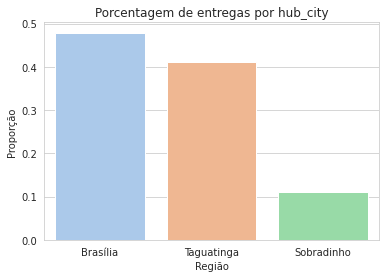

In [215]:
#Visualização das entregas por porcentagem da capacidade de veiculos

with sns.axes_style('whitegrid'):
  grafico = sns.barplot(data=data, x="hub_city", y="region_percent", ci=None, palette="pastel")
  grafico.set(title='Porcentagem de entregas por hub_city', xlabel='Região', ylabel='Proporção');


In [216]:
#Somando as quantidades de entregas por região para termos uma outra visualização em relação a quantidade de entregas por centro de distribuição!

data = deliveries_df[['region','delivery_size','delivery_city']].groupby('region').agg('sum').sort_values(by='delivery_size',ascending=False)
data.head()

,delivery_size
region,
df-1,1681582
df-2,1439010
df-0,385932


Text(0.5, 1.0, 'Quantidade de Entregas por Região')

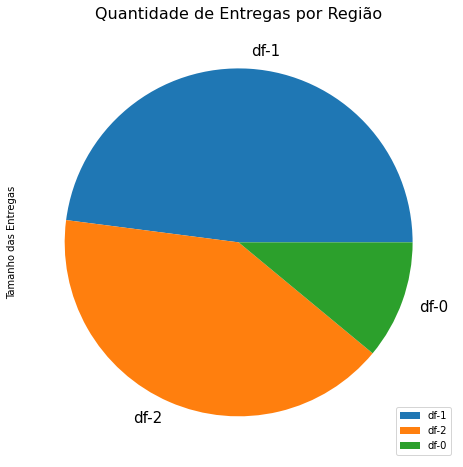

In [217]:
import matplotlib.pyplot as plt
data.plot.pie(y='delivery_size', figsize=(8, 8), ylabel='Tamanho das Entregas',fontsize=15)
plt.title("Quantidade de Entregas por Região", fontdict={"fontsize": 16})
# Visualizando por 'region'
#DF1 Brasilia,DF2 Taguatinga, DF3 Sobradinho

In [218]:
# Analisaremos aqui os 30 bairros com maior peso de entregas!

data = pd.DataFrame(deliveries_df[['delivery_suburb', 'delivery_size']].value_counts(normalize=False)).reset_index()
data.rename(columns={0: "delivery_percent"}, inplace=True)

data.head()

,delivery_suburb,delivery_size,delivery_percent
0,Brasília,8,5497
1,Brasília,9,5473
2,Brasília,4,5450
3,Brasília,7,5446
4,Brasília,10,5404


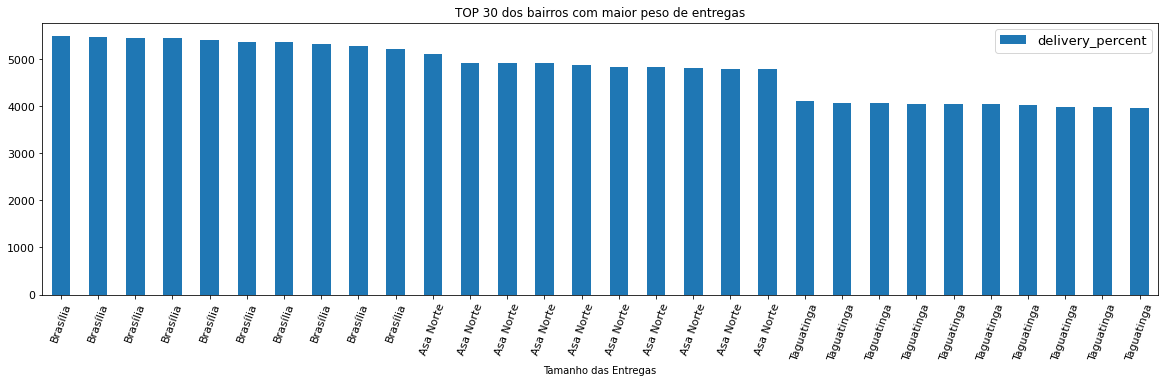

In [219]:
data.head(30).plot.bar(figsize=(20,5),x='delivery_suburb', y='delivery_percent',xlabel='Tamanho das Entregas', rot=70, title="TOP 30 dos bairros com maior peso de entregas",fontsize=11)
lgnd = plt.legend(prop={"size": 13})



<a id="section-5.3.1"></a>
#### 5. 2 Distribuição de peso da entrega por hub_city"

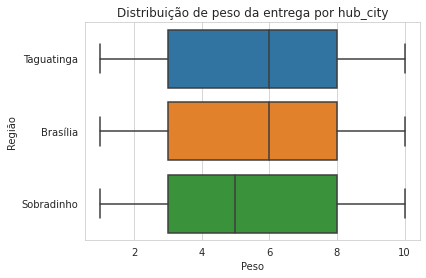

In [220]:
with sns.axes_style('whitegrid'):

  grafico = sns.boxplot(x=deliveries_df["delivery_size"], y=deliveries_df["hub_city"])
  grafico.set(title="Distribuição de peso da entrega por hub_city", xlabel="Peso", ylabel="Região")

In [221]:
# Somando as entregas por 'hub_city'!
data = deliveries_df[['hub_city','delivery_size','region']].groupby('hub_city').agg('sum').sort_values(by='delivery_size',ascending=False)
data.head()


,delivery_size
hub_city,
Brasília,1681582
Taguatinga,1439010
Sobradinho,385932


In [222]:
grafico = px.funnel( data, x= data.index, y= 'delivery_size',title='Quantidade de Entregas por hub_city	', width =500, height = 300 )
#grafico.update_yaxes(title="Soma de Entregas por hub_city	", title_font_color= "green")
grafico.update_xaxes(title="Região", title_font_color= "green")
grafico.show()

#Um gráfico de funil para representar a proporção das entregas por região!




<a id="section-5.3.1"></a>
#### 5. 3 Proporção de entregas por região de destino 'Cidades" e "Bairros"!

In [223]:
#Somando as quantidades de entregas por cidades! Usando um 'sort_values' para mostrar do menor para o maior, Usando o 'True'!
data = deliveries_df[['delivery_size','delivery_city']].groupby('delivery_city').agg('sum').sort_values(by='delivery_size',ascending=True)
data.head()

,delivery_size
delivery_city,
Novo Gama,2
Santo Antônio do Descoberto,6
Águas Lindas de Goiás,18
Valparaíso de Goiás,37
Café sem Troco,81


In [224]:
# Aqui temos a proporção de entregas por região de destino incluindo Brasília como cidade o que nos faz pensar sobre a consistência dos dados já que Brasília não é cidade, mas estado!
grafico = px.histogram( data, y= data.index, x= 'delivery_size',title='Proporção de entregas por Cidades', width = 500, height = 1000 )
grafico.update_xaxes(title="Soma das entregas", title_font_color= "green")
grafico.update_yaxes(title="Cidades", title_font_color= "green")
grafico.show()

In [225]:
#Somando as quantidades de entregas por Bairros! Usando um 'sort_values' para mostrar do menor para o maior, Usando o 'True'
# Achei interessante usar esse código porque vemos a menor quantidade exata de entregas por bairro!

data = deliveries_df[['delivery_size','delivery_suburb']].groupby('delivery_suburb').agg('sum').sort_values(by='delivery_size',ascending=True)
data.head()

,delivery_size
delivery_suburb,
Novo Gama,2
Jardim de Alá,6
Setor Hoteleiro Sul,7
Setor Comercial Sul,9
SCDN,10


In [226]:
grafico = px.histogram( data, y= data.index, x= 'delivery_size',title='Proporção de entregas por Bairros',width = 1000, height = 2000 )
grafico.update_xaxes(title="Soma das entregas", title_font_color= "green")
grafico.update_yaxes(title="Bairros", title_font_color= "green")
grafico.show()

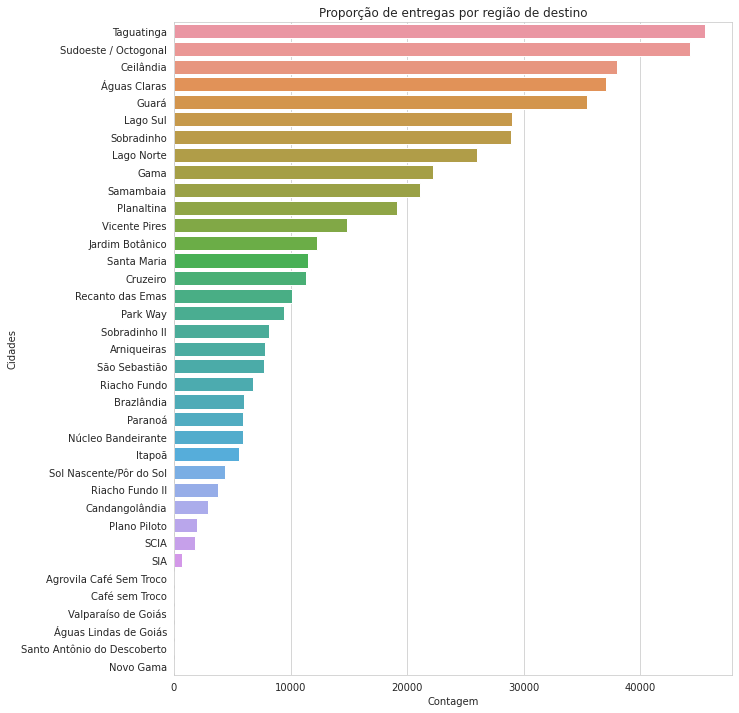

In [231]:

#Filtro para visualizar o plot sem a 'Cidade' Brasília!
deliveries_df = deliveries_df.query('delivery_city != "Brasília"')

with sns.axes_style('whitegrid'):
  
  grafico = sns.countplot(data=deliveries_df, y='delivery_city', order = deliveries_df['delivery_city'].value_counts().index)
  grafico.set(title='Proporção de entregas por região de destino', ylabel='Cidades', xlabel='Contagem');
  grafico.figure.set_size_inches(w=50/5, h=60/5)

## 5. 4 Entregas no Distrito Federal por Região de Origem

In [232]:
# coletando dados cartográficos / shapefiles do distrito federal

!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

In [233]:
# Criando um polígono com o mapa do distrito federal mostrando seu tamanho em latitude e longitude!

mapa = geopandas.read_file("distrito-federal.shp")
mapa = mapa.loc[[0]]
mapa.head()

,geometry
0,"POLYGON Z ((-47.31048 -16.03602 0.00000, -47.3..."


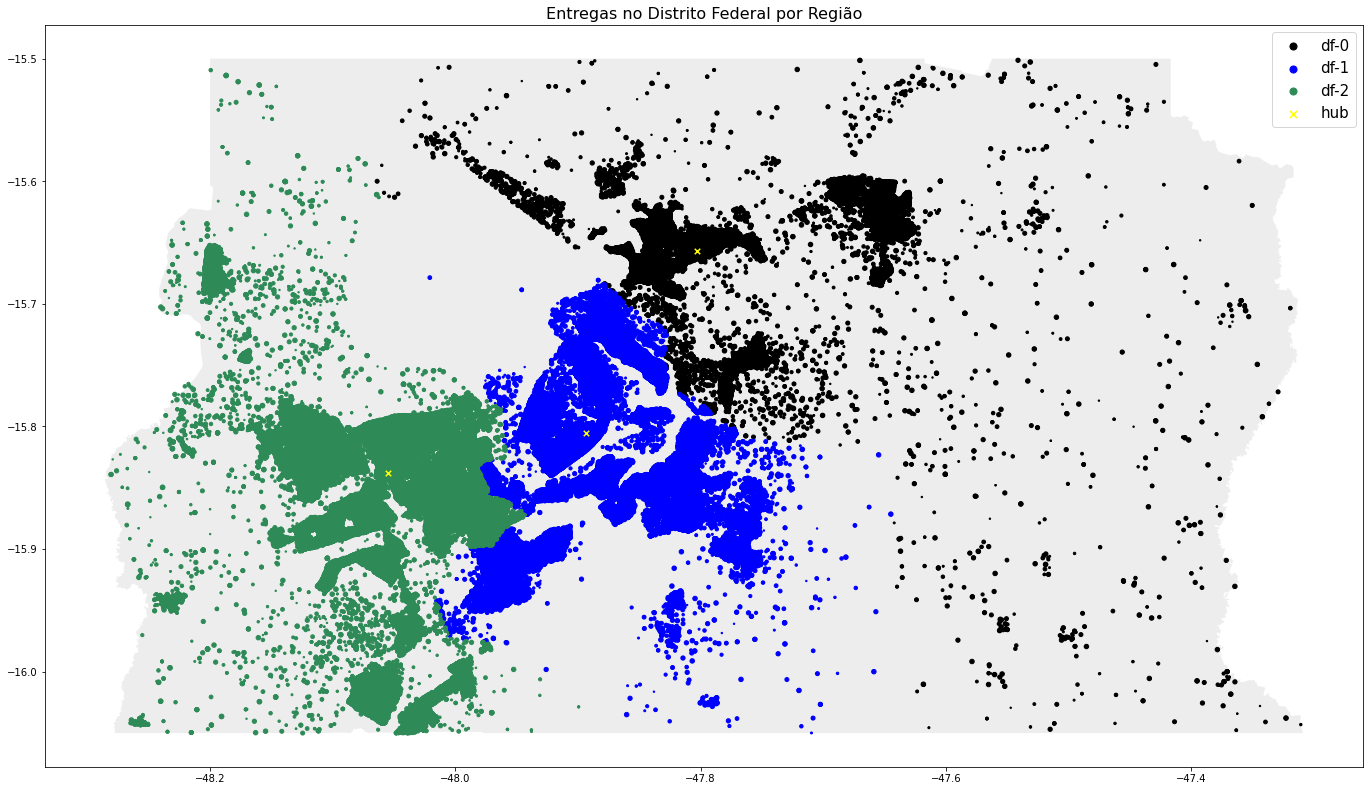

In [234]:
hub_df = deliveries_df[["region", "hub_lng", "hub_lat"]].drop_duplicates().reset_index(drop=True)
geo_hub_df = geopandas.GeoDataFrame(hub_df, geometry=geopandas.points_from_xy(hub_df["hub_lng"], hub_df["hub_lat"]))
geo_hub_df.head()

geo_deliveries_df = geopandas.GeoDataFrame(deliveries_df, geometry=geopandas.points_from_xy(deliveries_df["delivery_lng"], deliveries_df["delivery_lat"]))
geo_deliveries_df.head()

# cria o plot vazio
fig, ax = plt.subplots(figsize = (60/2.54, 60/2.54))

# plot mapa do distrito federal
mapa.plot(ax=ax, alpha=0.4, color="lightgrey")

# plot das entregas
geo_deliveries_df.query("region == 'df-0'").plot(ax=ax, markersize=geo_deliveries_df["delivery_size"] * 2, color="black", label="df-0")
geo_deliveries_df.query("region == 'df-1'").plot(ax=ax, markersize=geo_deliveries_df["delivery_size"] * 2, color="blue", label="df-1")
geo_deliveries_df.query("region == 'df-2'").plot(ax=ax, markersize=geo_deliveries_df["delivery_size"] * 2, color="seagreen", label="df-2")

# plot dos hubs  (o X mostra o local dos centros de distribuição)
geo_hub_df.plot(ax=ax, markersize=30, marker="x", color="yellow", label="hub")

# plot da legenda
plt.title("Entregas no Distrito Federal por Região", fontdict={"fontsize": 16})
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

## 6\. Insights

 - No gráfico da seção [**5.1**](https://colab.research.google.com/drive/17EHjAegCjfUDWtxIhBpDQ8L2YUAr4GSd#scrollTo=25GR1gzPs14X&line=3&uniqifier=1) analisamos a porcentagem de entregas por região, podemos visualizar claramente que a região df-1(Brasilia) é onde se concentra a maior parte das entregas! Percebemos também que a quantidade de veículos é a mesma para ambas! Talvez pela distância das regiões seja necessário a quantidade por igual de veículos.
Talvez rever o tipo de veículo utilizado, visando a economia de combustível seja um fator interessante! No caso do df 2 (Sobradinho	) talvez o uso de mais motos poderia suprir a necessidade já que as entregas são em menor quantidade.
Ainda na seção **5.1** temos um gráfico de setores onde podemos ter uma visualizão diferente do tamanho das entregas por região! Em seguida temos um gráfico de barras com o top 30 dos bairros com maior peso nas entregas!


   - Na seção [**5.2**](https://colab.research.google.com/drive/17EHjAegCjfUDWtxIhBpDQ8L2YUAr4GSd#scrollTo=EBLu_v-68pcu&line=3&uniqifier=1) temos um boxplot com a distribuição de peso da entrega por hub_city
e um gráfico de funil para representar a proporção das entregas por região!


   - Na seção [**5.3**](https://colab.research.google.com/drive/17EHjAegCjfUDWtxIhBpDQ8L2YUAr4GSd#scrollTo=vd2Oqv3IzTAC&line=2&uniqifier=1) temos a proporção de entregas por região de destino incluindo Brasília como cidade o que nos faz pensar sobre a consistência dos dados já que Brasília não é cidade, mas estado! Temos também uma visualização do peso das entregas por bairros! Podemos questionar a razão de existir bairros que possuem pouquíssimas entregas! Importante aumentar as entregas nesses bairros!


  - No gráfico da seção [**5.4**](https://colab.research.google.com/drive/17EHjAegCjfUDWtxIhBpDQ8L2YUAr4GSd#scrollTo=SNrSMVVj48kz&line=1&uniqifier=1) visualizamos a concentração das entregas por região o que nos leva a questão da quantidade de veículos que cada região utiliza
e o tipo de veículo para visar uma possível rapidez nas entregas e economia de combustível!